In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [53]:
print(df.shape)

(1000, 8)


In [54]:
print(df.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [55]:
df.isnull().sum

<bound method DataFrame.sum of      gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                      False       False          False          False  
2                      False       False          False          False  
3                      False       False          False          False  
4                      False       False          False          False  
..                       ...         ...            ...            ...  
995                    False       False          False          False  
996                    False       False          False          False  
997                    False       False          False          False  
998                    False       False          False          False  
999                    False       False          False          False  

[1000 rows x 8 columns]>

In [56]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

In [57]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


<Axes: xlabel='gender', ylabel='Count'>

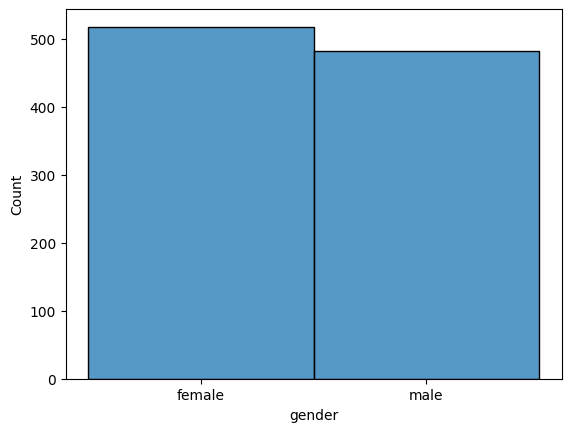

In [58]:
sns.histplot(df['gender'])

<Axes: xlabel='gender', ylabel='writing score'>

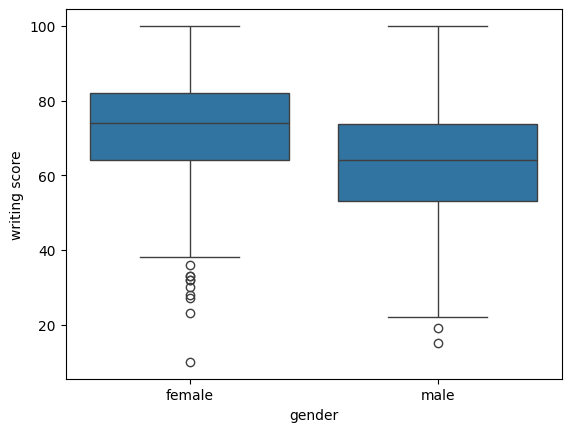

In [59]:
sns.boxplot(x='gender', y = 'writing score', data =df)

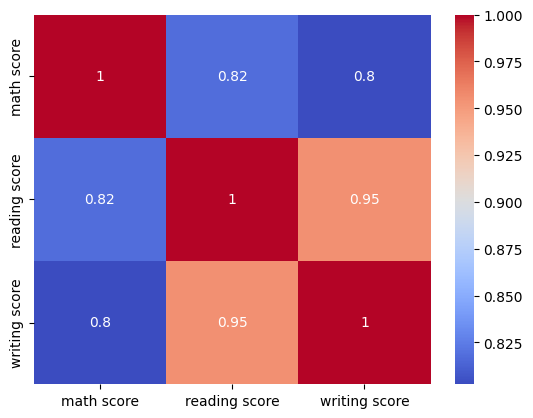

In [60]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot = True, cmap='coolwarm')
plt.show()

In [61]:
print(x_train.dtypes)
print(y_train.dtypes)

reading score                                    int64
writing score                                    int64
gender_male                                       bool
race/ethnicity_group B                            bool
race/ethnicity_group C                            bool
race/ethnicity_group D                            bool
race/ethnicity_group E                            bool
parental level of education_bachelor's degree     bool
parental level of education_high school           bool
parental level of education_master's degree       bool
parental level of education_some college          bool
parental level of education_some high school      bool
lunch_standard                                    bool
test preparation course_none                      bool
dtype: object
int64


In [62]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [64]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(x_test)
print(y_pred[:5])

[70.98706782 57.87750848 65.41298793 61.93275721 96.01635659]


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [67]:
print("MSE", mse)
print("R^2", r2)

MSE 29.314085103916053
R^2 0.8610303624645774


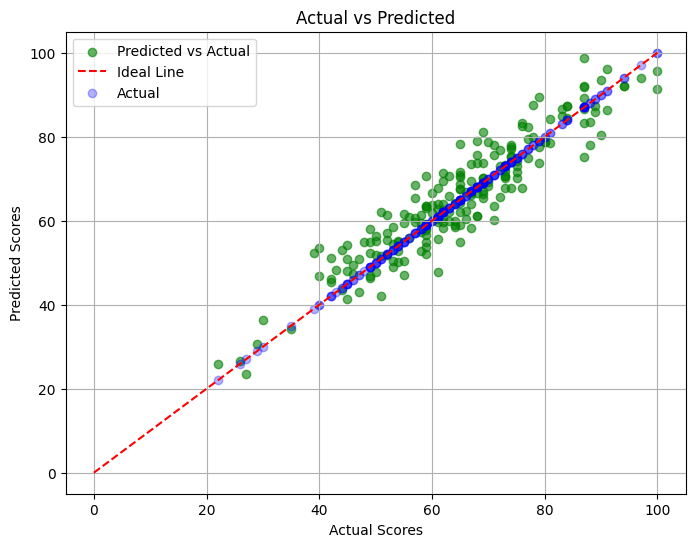

In [77]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Ideal Line')
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Actual')

plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [69]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3


In [70]:
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

In [71]:
df['parent_edu_score'] = df['parental level of education'].map(education_mapping)

In [72]:
df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [73]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [74]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [75]:
# First, define a new student
new_student = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group C'],
    'parental level of education': ['bachelor\'s degree'],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'reading score': [88],
    'writing score': [92]
})

new_student_encoded = pd.get_dummies(new_student)
new_student_encoded = new_student_encoded.reindex(columns=x_train.columns, fill_value=0)
model.predict(new_student_encoded)


array([78.64653228])

In [76]:
predicted_math_score = model.predict(new_student_encoded)
print(predicted_math_score[0])

78.64653227537525
